Please notice that we use the Version 2 dataset: https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data/version/2

After download the dataset, there are three json files, please save them and change the below code to the directory in your own computer:

In [1]:
files = {}
files['train'] = './input\\training_set\\training_set.json'
files['valid'] = './input\\validation_set\\validation_set.json'
files['test'] = './input\\test_set\\test_set.json'

In [10]:
import numpy as np
import pandas as pd
import json
import torch
from tqdm.auto import tqdm

Load training data:

In [9]:
train_dict = json.load(open(files['train'], 'r')) # uses ~8GB in RAM

In [12]:
samples = list(train_dict['root'].keys()) # get sample hashes
def get_sample_by_hash(sample_hash):
    return train_dict['root'][sample_hash]
len(samples)

118057

In [13]:
random_sample = get_sample_by_hash(samples[np.random.randint(len(samples))])

In [14]:
random_sample.keys()

dict_keys(['class', 'values', 'meta'])

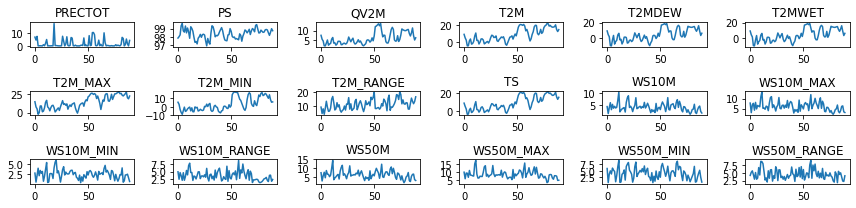

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 6, figsize=(12,3))
for i, (key, val) in enumerate(random_sample['values'].items()):
    axs[i // 6, i % 6].plot(np.arange(90), val)
    axs[i // 6, i % 6].set_title(key)
fig.tight_layout()
plt.show()

In [16]:
keys = sorted(list(random_sample['values'].keys()))
keys

['PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE']

In [17]:
# create tensors
np.random.seed(42)
np.random.shuffle(samples)
y_map = {
    'None': 0,
    'D0': 1,
    'D1': 2,
    'D2': 3,
    'D3': 4,
    'D4': 5,
}

id2class = {v: k for k, v in y_map.items()}
X = torch.zeros([len(samples), 90, 18])
y = torch.zeros([len(samples)])
skip_count = 0
for i, sample in tqdm(enumerate(samples), total=len(samples)):
    sample = get_sample_by_hash(sample)
    input_tensor = torch.zeros([90, 18])
    try:
        for j in range(90):
            input_tensor[j] = torch.tensor([sample['values'][key][j] for key in keys])
        X[i-skip_count] = input_tensor
        y[i-skip_count] = float(y_map[sample['class']])
    except:
        skip_count += 1

  0%|          | 0/118057 [00:00<?, ?it/s]

In [18]:
del train_dict # free up memory

In [19]:
X = X[:-skip_count]
y = y[:-skip_count]

In [20]:
X.shape

torch.Size([118024, 90, 18])

In [21]:
y.shape

torch.Size([118024])

In [22]:
X = X.cpu().detach().numpy()
y = y.cpu().detach().numpy()

In [23]:
X.shape

(118024, 90, 18)

In [24]:
y.shape

(118024,)

Load validation data:

In [25]:
valid_dict = json.load(open(files['valid'], 'r'))

In [26]:
samples = list(valid_dict['root'].keys()) # get sample hashes
def get_sample_by_hash(sample_hash):
    return valid_dict['root'][sample_hash]
len(samples)

20729

In [27]:
# create tensors
np.random.seed(42)
np.random.shuffle(samples)
y_map = {
    'None': 0,
    'D0': 1,
    'D1': 2,
    'D2': 3,
    'D3': 4,
    'D4': 5,
}
X_valid = torch.zeros([len(samples), 90, 18])
y_valid = torch.zeros([len(samples)])
skip_count = 0
for i, sample in tqdm(enumerate(samples), total=len(samples)):
    sample = get_sample_by_hash(sample)
    input_tensor = torch.zeros([90, 18])
    try:
        for j in range(90):
            input_tensor[j] = torch.tensor([sample['values'][key][j] for key in keys])
        X_valid[i-skip_count] = input_tensor
        y_valid[i-skip_count] = float(y_map[sample['class']])
    except:
        skip_count += 1

  0%|          | 0/20729 [00:00<?, ?it/s]

In [28]:
X_valid = X_valid[:-skip_count]
y_valid = y_valid[:-skip_count]

In [29]:
X_valid = X_valid.cpu().detach().numpy()
y_valid = y_valid.cpu().detach().numpy()

In [30]:
X_valid.shape

(20721, 90, 18)

In [31]:
y_valid.shape

(20721,)

Load test data:

In [32]:
test_dict = json.load(open(files['test'], 'r'))

samples = list(test_dict['root'].keys()) # get sample hashes
def get_sample_by_hash(sample_hash):
    return test_dict['root'][sample_hash]

# create tensors
np.random.seed(42)
np.random.shuffle(samples)
y_map = {
    'None': 0,
    'D0': 1,
    'D1': 2,
    'D2': 3,
    'D3': 4,
    'D4': 5,
}
X_test = torch.zeros([len(samples), 90, 18])
y_test = torch.zeros([len(samples)])
skip_count = 0
for i, sample in tqdm(enumerate(samples), total=len(samples)):
    sample = get_sample_by_hash(sample)
    input_tensor = torch.zeros([90, 18])
    try:
        for j in range(90):
            input_tensor[j] = torch.tensor([sample['values'][key][j] for key in keys])
        X_test[i-skip_count] = input_tensor
        y_test[i-skip_count] = float(y_map[sample['class']])
    except:
        skip_count += 1

  0%|          | 0/102459 [00:00<?, ?it/s]

In [37]:
skip_count

29

In [33]:
X_test = X_test[:-skip_count]
y_test = y_test[:-skip_count]

In [34]:
X_test = X_test.cpu().detach().numpy()
y_test = y_test.cpu().detach().numpy()

In [35]:
X_test.shape

(102430, 90, 18)

In [36]:
y_test.shape

(102430,)

Save these variables into a numpy npz file:

In [ ]:
np.savez('./data_ndarray.npz', X_train=X, y_train=y, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test)